# **Applying KMeans Clustering (using scikit learn) and Hierarchical Clustering (using scikit learn) on preprocessed data**

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/vehicalesDataCleaned.csv', nrows= 10000)
dataset.head(10)

,Unnamed: 0,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,31,16,15000,2013.0,13,7074,0,6.0,2,128000.0,0,0,2,10,0,1,32.5920,-85.518900
1,32,16,27990,2012.0,14,14119,2,8.0,2,68696.0,0,2,0,8,0,1,32.5900,-85.480000
2,33,16,34590,2016.0,7,14355,2,6.0,2,29499.0,0,2,0,8,9,1,32.5900,-85.480000
3,34,16,35000,2019.0,38,15423,0,6.0,2,43000.0,0,0,0,10,5,1,32.6013,-85.443974
4,35,16,29990,2016.0,7,4510,2,6.0,2,17302.0,0,2,0,8,8,1,32.5900,-85.480000
5,36,16,38590,2011.0,7,4833,2,8.0,2,30237.0,0,2,2,7,8,1,32.5900,-85.480000
6,38,16,32990,2017.0,20,17073,2,6.0,2,30041.0,0,2,0,7,9,1,32.5900,-85.480000
7,39,16,24590,2017.0,7,14417,2,6.0,2,40784.0,0,2,0,8,10,1,32.5900,-85.480000
8,40,16,30990,2016.0,7,4506,2,6.0,4,34940.0,0,2,0,8,1,1,32.5900,-85.480000
9,41,16,27990,2014.0,38,15471,2,6.0,4,17805.0,0,2,0,8,8,1,32.5900,-85.480000


In [4]:
dataset = dataset.drop(['Unnamed: 0'], axis=1)

# **Applying Hierarchical Clustering**

In [5]:
from sklearn.preprocessing import normalize

data_scaled = normalize(dataset)
data_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
data_scaled.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long
0,0.000124,0.116202,0.015594,0.000101,0.054801,0.000000,0.000046,0.000015,0.991590,0.0,0.000000,0.000015,0.000077,0.000000,0.000008,0.000252,-0.000662
1,0.000212,0.370542,0.026636,0.000185,0.186913,0.000026,0.000106,0.000026,0.909424,0.0,0.000026,0.000000,0.000106,0.000000,0.000013,0.000431,-0.001132
2,0.000335,0.724917,0.042250,0.000147,0.300844,0.000042,0.000126,0.000042,0.618223,0.0,0.000042,0.000000,0.000168,0.000189,0.000021,0.000683,-0.001791
3,0.000278,0.607804,0.035062,0.000660,0.267833,0.000000,0.000104,0.000035,0.746731,0.0,0.000000,0.000000,0.000174,0.000087,0.000017,0.000566,-0.001484
4,0.000457,0.857497,0.057643,0.000200,0.128953,0.000057,0.000172,0.000057,0.494712,0.0,0.000057,0.000000,0.000229,0.000229,0.000029,0.000932,-0.002444


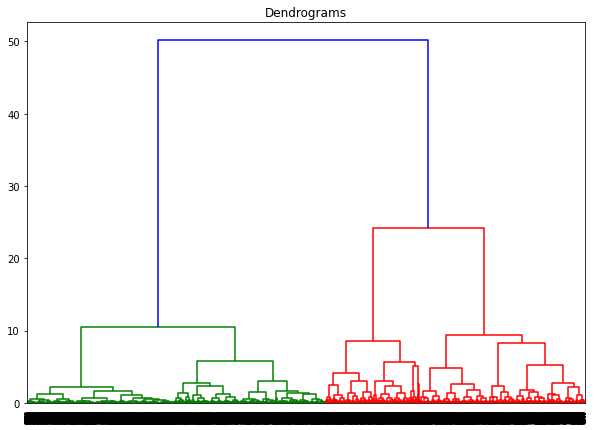

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

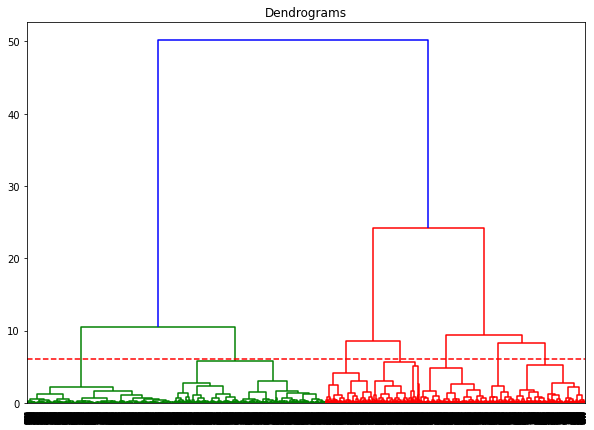

In [7]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

# **Applying KMeans using scikit learn**

In [8]:
scaler =  StandardScaler()
scaler.fit(dataset)
X_scaled = scaler.transform(dataset)

In [9]:
pca = PCA(n_components = 2)
data_embeddings = pca.fit_transform(X_scaled)

In [10]:
from sklearn.cluster import KMeans

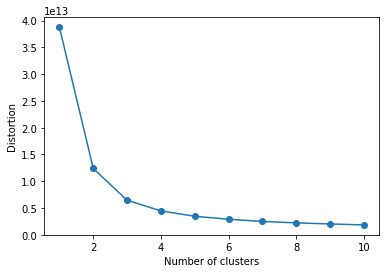

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(dataset)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [12]:
clusters = KMeans(
        n_clusters=3, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )

In [13]:
y_output = clusters.fit_predict(dataset)
y_output

array([0, 0, 2, ..., 2, 0, 0], dtype=int32)

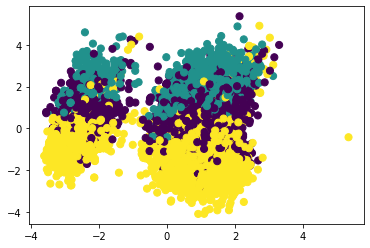

In [14]:
plt.scatter(data_embeddings[:, 0], data_embeddings[:, 1], c=y_output, s=50, cmap='viridis')